In [2]:
pip install yfinance pandas beautifulsoup4 requests matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
#1.
import yfinance as yf

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Save to CSV
tesla_data.to_csv("tesla_stock_data.csv", index=False)
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [18]:
#2.
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

try:
    # Make an HTTP request with headers
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an error for failed requests
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find all tables on the webpage
    tables = soup.find_all("table")

    # Loop through tables to find the one with "Tesla Quarterly Revenue"
    revenue_table = None
    for table in tables:
        if "Tesla Quarterly Revenue" in table.text:
            revenue_table = table
            break

    # Check if the correct table is found
    if revenue_table is None:
        print("Revenue table not found on the webpage.")
    else:
        # Extract rows from the revenue table
        rows = revenue_table.find_all("tr")

        tesla_revenue = []
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) > 1:  # Ensure row has the expected number of columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # Avoid adding empty or invalid data
                    tesla_revenue.append([date, revenue])

        # Convert to DataFrame
        tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])
        tesla_revenue_df.to_csv("tesla_revenue_data.csv", index=False)
        print("Tesla Revenue Data:")
        print(tesla_revenue_df.head())

except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching data: {e}")


Tesla Revenue Data:
         Date Revenue
0  2024-09-30   25182
1  2024-06-30   25500
2  2024-03-31   21301
3  2023-12-31   25167
4  2023-09-30   23350


In [20]:
3.
# Fetch GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

# Save to CSV
gamestop_data.to_csv("gamestop_stock_data.csv", index=False)
print(gamestop_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [24]:
#4.
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

try:
    # Make an HTTP request with headers
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an error for failed requests
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find all tables on the webpage
    tables = soup.find_all("table")

    # Loop through tables to find the one with "GameStop Quarterly Revenue"
    revenue_table = None
    for table in tables:
        if "GameStop Quarterly Revenue" in table.text:
            revenue_table = table
            break

    # Check if the correct table is found
    if revenue_table is None:
        print("Revenue table not found on the webpage.")
    else:
        # Extract rows from the revenue table
        rows = revenue_table.find_all("tr")

        gamestop_revenue = []
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) > 1:  # Ensure row has the expected number of columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # Avoid adding empty or invalid data
                    gamestop_revenue.append([date, revenue])

        # Convert to DataFrame
        gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=["Date", "Revenue"])
        gamestop_revenue_df.to_csv("gamestop_revenue_data.csv", index=False)
        print("GameStop Revenue Data:")
        print(gamestop_revenue_df.head())

except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching data: {e}")


GameStop Revenue Data:
         Date Revenue
0  2024-10-31     860
1  2024-07-31     798
2  2024-04-30     882
3  2024-01-31    1794
4  2023-10-31    1078


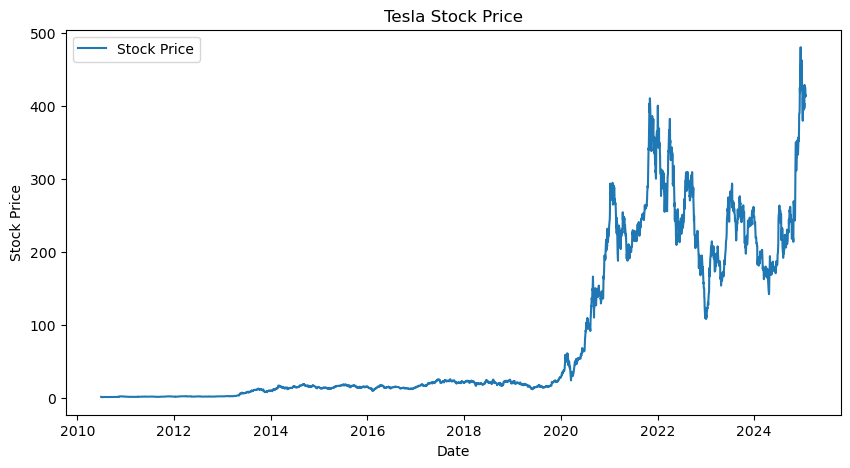

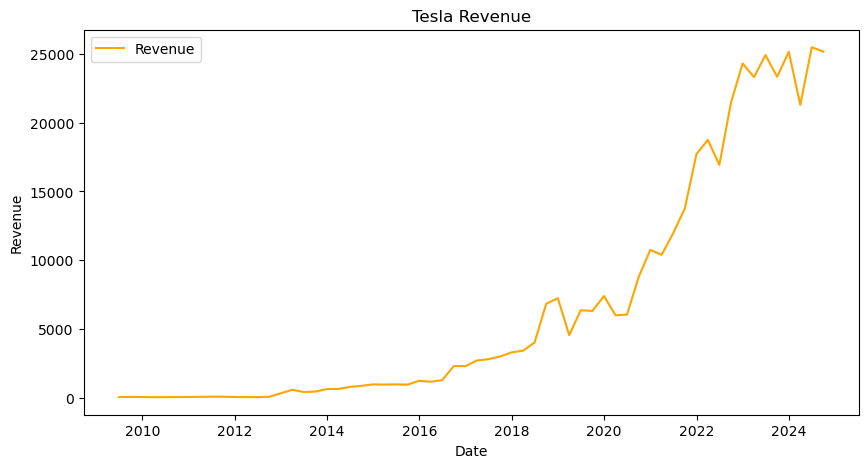

In [28]:
#5.
import matplotlib.pyplot as plt

# Plot Tesla Stock Data
plt.figure(figsize=(10, 5))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot Tesla Revenue Data
tesla_revenue_df["Date"] = pd.to_datetime(tesla_revenue_df["Date"])
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"], errors="coerce")

plt.figure(figsize=(10, 5))
plt.plot(tesla_revenue_df["Date"], tesla_revenue_df["Revenue"], label="Revenue", color="orange")
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


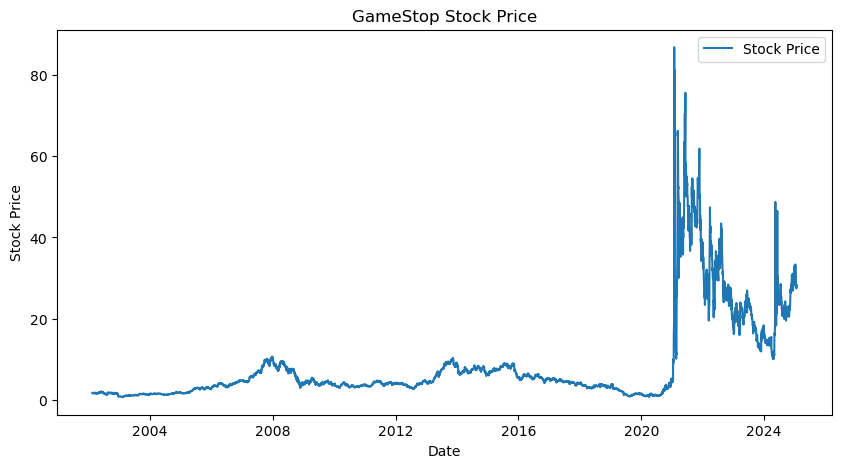

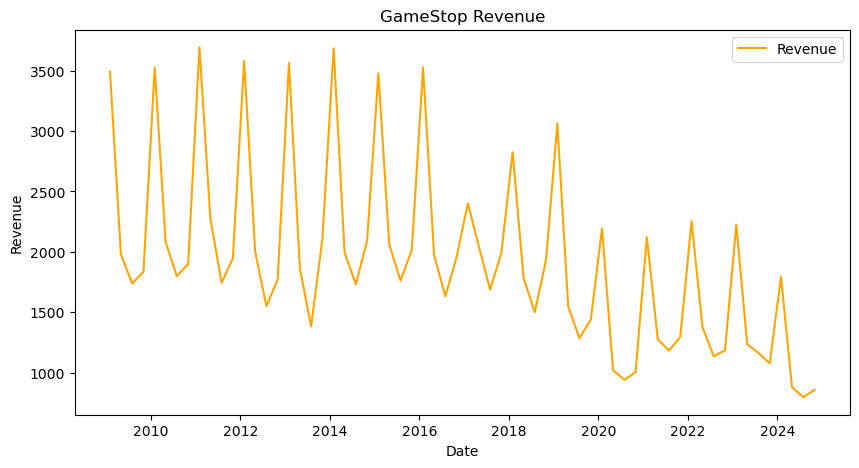

In [30]:
#6.
# Plot GameStop Stock Data
plt.figure(figsize=(10, 5))
plt.plot(gamestop_data["Date"], gamestop_data["Close"], label="Stock Price")
plt.title("GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Plot GameStop Revenue Data
gamestop_revenue_df["Date"] = pd.to_datetime(gamestop_revenue_df["Date"])
gamestop_revenue_df["Revenue"] = pd.to_numeric(gamestop_revenue_df["Revenue"], errors="coerce")

plt.figure(figsize=(10, 5))
plt.plot(gamestop_revenue_df["Date"], gamestop_revenue_df["Revenue"], label="Revenue", color="orange")
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()
